In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:

# Load the dataset with a specified encoding
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
# Check for missing values
print(data.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [9]:
# You may want to drop or fill missing values, here we drop rows with any missing values
data.dropna(inplace=True)

In [10]:
# Select numerical features for clustering
# Adjust the features based on your dataset
features = data.select_dtypes(include=[np.number])

In [11]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
#  Determine the Optimal Number of Clusters Using the Elbow Method

In [13]:
# Calculate the WCSS (Within-Cluster Sum of Squares) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


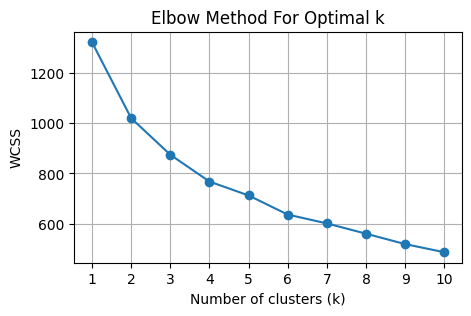

In [15]:
# Plot the elbow method
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [16]:
# Fit the K-Means Model with the Optimal Number of Clusters

In [17]:
# Fit K-Means with the optimal number of clusters
optimal_k = 3  # Replace with the optimal k determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [18]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Display the dataset with cluster labels
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Cluster
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,0
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,2
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,1
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,2
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,0


In [19]:
# Visualize the Clusters

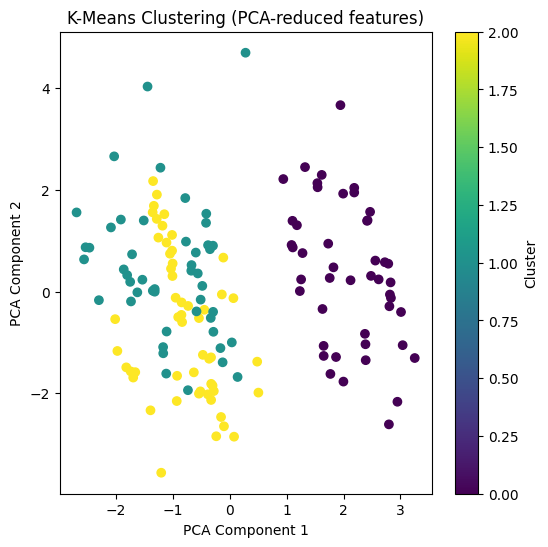

In [22]:
# Optional: Visualize the clusters (only if you have 2 or 3 dimensions)
# Here we will use PCA to reduce to 2 dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(6, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering (PCA-reduced features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
